In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Educational preferences
## A study on subject popularity and global trends in education
## Author: Margarita Savova

### Abstract

We are exploring two datasets on education and finding trends in most prefered course subjects and target groups.

### Getting Data

Let's read the CSV file first. It is said to contain data on **290 Harvard and MIT online courses**, 250 thousand certifications, 4.5 million participants, and 28 million participant hours **on the edX platform from 2012 on for the duration of 4 years**.

In [3]:
course_data = pd.read_csv("appendix.csv")
course_data.head()

,Institution,Course Number,Launch Date,Course Title,Instructors,Course Subject,Year,Honor Code Certificates,Participants (Course Content Accessed),Audited (> 50% Course Content Accessed),...,% Certified of > 50% Course Content Accessed,% Played Video,% Posted in Forum,% Grade Higher Than Zero,Total Course Hours (Thousands),Median Hours for Certification,Median Age,% Male,% Female,% Bachelor's Degree or Higher
0,MITx,6.002x,09/05/2012,Circuits and Electronics,Khurram Afridi,"Science, Technology, Engineering, and Mathematics",1,1,36105,5431,...,54.98,83.2,8.17,28.97,418.94,64.45,26.0,88.28,11.72,60.68
1,MITx,6.00x,09/26/2012,Introduction to Computer Science and Programming,"Eric Grimson, John Guttag, Chris Terman",Computer Science,1,1,62709,8949,...,64.05,89.14,14.38,39.50,884.04,78.53,28.0,83.50,16.50,63.04
2,MITx,3.091x,10/09/2012,Introduction to Solid State Chemistry,Michael Cima,"Science, Technology, Engineering, and Mathematics",1,1,16663,2855,...,72.85,87.49,14.42,34.89,227.55,61.28,27.0,70.32,29.68,58.76
3,HarvardX,CS50x,10/15/2012,Introduction to Computer Science,"David Malan, Nate Hardison, Rob Bowden, Tommy ...",Computer Science,1,1,129400,12888,...,11.11,0,0.00,1.11,220.90,0.00,28.0,80.02,19.98,58.78
4,HarvardX,PH207x,10/15/2012,Health in Numbers: Quantitative Methods in Cli...,"Earl Francis Cook, Marcello Pagano","Government, Health, and Social Science",1,1,52521,10729,...,47.12,77.45,15.98,32.52,804.41,76.10,32.0,56.78,43.22,88.33


In [4]:
course_data.shape

(290, 23)

Since not all of the columns in the dataset are visible in the default view, we can increase the number of visible columns.

In [5]:
pd.options.display.max_columns = 30

Now is the time to make the column names "Pythonic".

In [6]:
course_data.columns = ["institution","course_number","launch_date","course_title","instructors","course_subject","year",
                       "honor_code_certificates","participants_course_content_accessed","audited_>50%_course_content_accessed",
                       "certified","%_audited","%_certified","%_certified_of_>50%_course_content_accessed",
                       "%_played_video","%_posted_in_forum","%_grade_higher_than_zero","total_course_hours_thousands",
                       "median_hours_for_certification","median_age","%_male","%_female","%_bachelor's_degree_or_higher"]
course_data.head()

,institution,course_number,launch_date,course_title,instructors,course_subject,year,honor_code_certificates,participants_course_content_accessed,audited_>50%_course_content_accessed,certified,%_audited,%_certified,%_certified_of_>50%_course_content_accessed,%_played_video,%_posted_in_forum,%_grade_higher_than_zero,total_course_hours_thousands,median_hours_for_certification,median_age,%_male,%_female,%_bachelor's_degree_or_higher
0,MITx,6.002x,09/05/2012,Circuits and Electronics,Khurram Afridi,"Science, Technology, Engineering, and Mathematics",1,1,36105,5431,3003,15.04,8.32,54.98,83.2,8.17,28.97,418.94,64.45,26.0,88.28,11.72,60.68
1,MITx,6.00x,09/26/2012,Introduction to Computer Science and Programming,"Eric Grimson, John Guttag, Chris Terman",Computer Science,1,1,62709,8949,5783,14.27,9.22,64.05,89.14,14.38,39.50,884.04,78.53,28.0,83.50,16.50,63.04
2,MITx,3.091x,10/09/2012,Introduction to Solid State Chemistry,Michael Cima,"Science, Technology, Engineering, and Mathematics",1,1,16663,2855,2082,17.13,12.49,72.85,87.49,14.42,34.89,227.55,61.28,27.0,70.32,29.68,58.76
3,HarvardX,CS50x,10/15/2012,Introduction to Computer Science,"David Malan, Nate Hardison, Rob Bowden, Tommy ...",Computer Science,1,1,129400,12888,1439,9.96,1.11,11.11,0,0.00,1.11,220.90,0.00,28.0,80.02,19.98,58.78
4,HarvardX,PH207x,10/15/2012,Health in Numbers: Quantitative Methods in Cli...,"Earl Francis Cook, Marcello Pagano","Government, Health, and Social Science",1,1,52521,10729,5058,20.44,9.64,47.12,77.45,15.98,32.52,804.41,76.10,32.0,56.78,43.22,88.33


Now we can check if the number of columns is the same after renaming them.

In [7]:
course_data.shape

(290, 23)

### Inspecting and filling missing data

First we can explore the data types in the dataset and check if all columns have the right type.

In [8]:
course_data.dtypes

institution                                     object
course_number                                   object
launch_date                                     object
course_title                                    object
instructors                                     object
course_subject                                  object
year                                             int64
honor_code_certificates                          int64
participants_course_content_accessed             int64
audited_>50%_course_content_accessed             int64
certified                                        int64
%_audited                                      float64
%_certified                                    float64
%_certified_of_>50%_course_content_accessed    float64
%_played_video                                  object
%_posted_in_forum                              float64
%_grade_higher_than_zero                       float64
total_course_hours_thousands                   float64
median_hou

We notice the launch date is an int. We can convert it to datetime.

In [9]:
course_data.launch_date = pd.to_datetime(course_data.launch_date, dayfirst = True)
course_data.launch_date. head()

0   2012-05-09
1   2012-09-26
2   2012-09-10
3   2012-10-15
4   2012-10-15
Name: launch_date, dtype: datetime64[ns]

Let's see how many values are missing for each column of the dataset.

In [10]:
course_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 23 columns):
institution                                    290 non-null object
course_number                                  290 non-null object
launch_date                                    290 non-null datetime64[ns]
course_title                                   290 non-null object
instructors                                    289 non-null object
course_subject                                 290 non-null object
year                                           290 non-null int64
honor_code_certificates                        290 non-null int64
participants_course_content_accessed           290 non-null int64
audited_>50%_course_content_accessed           290 non-null int64
certified                                      290 non-null int64
%_audited                                      290 non-null float64
%_certified                                    290 non-null float64
%_certified_of_>50%

The column "instructors" has 1 value less then the others. Let's check which one it is.

In [11]:
course_data[course_data["instructors"].isnull()]

,institution,course_number,launch_date,course_title,instructors,course_subject,year,honor_code_certificates,participants_course_content_accessed,audited_>50%_course_content_accessed,certified,%_audited,%_certified,%_certified_of_>50%_course_content_accessed,%_played_video,%_posted_in_forum,%_grade_higher_than_zero,total_course_hours_thousands,median_hours_for_certification,median_age,%_male,%_female,%_bachelor's_degree_or_higher
221,HarvardX,CS50x,2016-01-01,Introduction to Computer Science (2016),NaN,Computer Science,4,1,168335,10245,417,6.09,0.25,2.93,69.02,0.0,0.0,708.69,0.0,23.0,77.44,22.56,49.51


We can check if there are other instances of the same course. Let's explore "course_number" column for observations with the same value. This way we can see who the tutor was in other instances of the same course and check if we can replace the missing value with them.

In [12]:
course_data.loc[course_data["course_number"] == "CS50x"]

,institution,course_number,launch_date,course_title,instructors,course_subject,year,honor_code_certificates,participants_course_content_accessed,audited_>50%_course_content_accessed,certified,%_audited,%_certified,%_certified_of_>50%_course_content_accessed,%_played_video,%_posted_in_forum,%_grade_higher_than_zero,total_course_hours_thousands,median_hours_for_certification,median_age,%_male,%_female,%_bachelor's_degree_or_higher
3,HarvardX,CS50x,2012-10-15,Introduction to Computer Science,"David Malan, Nate Hardison, Rob Bowden, Tommy ...",Computer Science,1,1,129400,12888,1439,9.96,1.11,11.11,0,0.0,1.11,220.90,0.0,28.0,80.02,19.98,58.78
32,HarvardX,CS50x,2014-01-01,Introduction to Computer Science,David Malan,Computer Science,3,1,259577,22894,1208,8.82,0.47,5.24,72.41,0.0,0.00,853.36,0.0,27.0,77.89,22.11,54.82
99,HarvardX,CS50x,2015-01-01,Introduction to Computer Science,David Malan,Computer Science,3,1,301082,25637,1523,8.51,0.51,5.45,67.8,0.0,0.00,275.96,0.0,25.0,77.68,22.32,51.95
221,HarvardX,CS50x,2016-01-01,Introduction to Computer Science (2016),NaN,Computer Science,4,1,168335,10245,417,6.09,0.25,2.93,69.02,0.0,0.00,708.69,0.0,23.0,77.44,22.56,49.51


After checking CS50x edX page and CS50x YouTube channel it became clear that David Malan was still the instructor of the course in 2016, and is in fact such to this day. Thus, we can replace the NaN value in the dataset with the name of this instructor.

In [13]:
course_data.instructors = course_data.instructors.fillna("David Malan")
course_data.loc[course_data["course_number"] == "CS50x"]

,institution,course_number,launch_date,course_title,instructors,course_subject,year,honor_code_certificates,participants_course_content_accessed,audited_>50%_course_content_accessed,certified,%_audited,%_certified,%_certified_of_>50%_course_content_accessed,%_played_video,%_posted_in_forum,%_grade_higher_than_zero,total_course_hours_thousands,median_hours_for_certification,median_age,%_male,%_female,%_bachelor's_degree_or_higher
3,HarvardX,CS50x,2012-10-15,Introduction to Computer Science,"David Malan, Nate Hardison, Rob Bowden, Tommy ...",Computer Science,1,1,129400,12888,1439,9.96,1.11,11.11,0,0.0,1.11,220.90,0.0,28.0,80.02,19.98,58.78
32,HarvardX,CS50x,2014-01-01,Introduction to Computer Science,David Malan,Computer Science,3,1,259577,22894,1208,8.82,0.47,5.24,72.41,0.0,0.00,853.36,0.0,27.0,77.89,22.11,54.82
99,HarvardX,CS50x,2015-01-01,Introduction to Computer Science,David Malan,Computer Science,3,1,301082,25637,1523,8.51,0.51,5.45,67.8,0.0,0.00,275.96,0.0,25.0,77.68,22.32,51.95
221,HarvardX,CS50x,2016-01-01,Introduction to Computer Science (2016),David Malan,Computer Science,4,1,168335,10245,417,6.09,0.25,2.93,69.02,0.0,0.00,708.69,0.0,23.0,77.44,22.56,49.51


What we notice is that the course title of the last observation for this course number is different than the rest (it has a date added), which might have been the cause of the missing instructor name. Let us check if there are other observations with the same name.

In [14]:
course_data.loc[course_data["course_title"] == "Introduction to Computer Science (2016)"]

,institution,course_number,launch_date,course_title,instructors,course_subject,year,honor_code_certificates,participants_course_content_accessed,audited_>50%_course_content_accessed,certified,%_audited,%_certified,%_certified_of_>50%_course_content_accessed,%_played_video,%_posted_in_forum,%_grade_higher_than_zero,total_course_hours_thousands,median_hours_for_certification,median_age,%_male,%_female,%_bachelor's_degree_or_higher
221,HarvardX,CS50x,2016-01-01,Introduction to Computer Science (2016),David Malan,Computer Science,4,1,168335,10245,417,6.09,0.25,2.93,69.02,0.0,0.0,708.69,0.0,23.0,77.44,22.56,49.51


This is the only observation with this course title. We can replace the title with the common one.

In [15]:
course_data.replace({"course_title": {"Introduction to Computer Science (2016)": "Introduction to Computer Science"}}, inplace = True)

In [16]:
course_data.loc[course_data["course_title"] == "Introduction to Computer Science"]

,institution,course_number,launch_date,course_title,instructors,course_subject,year,honor_code_certificates,participants_course_content_accessed,audited_>50%_course_content_accessed,certified,%_audited,%_certified,%_certified_of_>50%_course_content_accessed,%_played_video,%_posted_in_forum,%_grade_higher_than_zero,total_course_hours_thousands,median_hours_for_certification,median_age,%_male,%_female,%_bachelor's_degree_or_higher
3,HarvardX,CS50x,2012-10-15,Introduction to Computer Science,"David Malan, Nate Hardison, Rob Bowden, Tommy ...",Computer Science,1,1,129400,12888,1439,9.96,1.11,11.11,0,0.0,1.11,220.90,0.0,28.0,80.02,19.98,58.78
32,HarvardX,CS50x,2014-01-01,Introduction to Computer Science,David Malan,Computer Science,3,1,259577,22894,1208,8.82,0.47,5.24,72.41,0.0,0.00,853.36,0.0,27.0,77.89,22.11,54.82
99,HarvardX,CS50x,2015-01-01,Introduction to Computer Science,David Malan,Computer Science,3,1,301082,25637,1523,8.51,0.51,5.45,67.8,0.0,0.00,275.96,0.0,25.0,77.68,22.32,51.95
221,HarvardX,CS50x,2016-01-01,Introduction to Computer Science,David Malan,Computer Science,4,1,168335,10245,417,6.09,0.25,2.93,69.02,0.0,0.00,708.69,0.0,23.0,77.44,22.56,49.51


Let's check if the number of courses generally corresponds to the number of course titles.

In [17]:
course_data.course_number.unique().size

188

In [18]:
course_data.course_title.unique().size

201

We see that there is a difference in the numbers. Let's check why this is so. We are going to group the course titles by course numbers and see how much data we have for any course number. We can then print only the cases in which we have more then one title, so that we can examine them.

In [19]:
course_titles_by_number = course_data.groupby("course_number")["course_title"]

In [20]:
for number, title_data in course_titles_by_number:
    print(number, " ", title_data.size)
    print(title_data)

0.111x   1
154    Making Science and Engineering Pictures: A Pra...
Name: course_title, dtype: object
10.03x   3
157    Making Biologic Medicines for Patients: The Pr...
203    Making Biologic Medicines for Patients: The Pr...
277    Making Biologic Medicines for Patients: The Pr...
Name: course_title, dtype: object
11.126x   2
93     Introduction to Game Design
262    Introduction to Game Design
Name: course_title, dtype: object
11.127x   1
136    Design and Development of Games for Learning
Name: course_title, dtype: object
11.132x   2
88     Design and Development of Educational Technology
233    Design and Development of Educational Technology
Name: course_title, dtype: object
11.133x   2
158    Implementation and Evaluation of Educational T...
284    Implementation and Evaluation of Educational T...
Name: course_title, dtype: object
11.405x   1
260    Just Money: Banking as if Society Mattered
Name: course_title, dtype: object
12.340x   2
40     Global Warming Science
240    Globa

In [21]:
for number, title_data in course_titles_by_number:
    if title_data.unique().size > 1:
        print(number)
        print(title_data.unique())

14.73x
['The Challenges of Global Poverty' 'Challenges of World Poverty']
15.662x
['The American Dream for the Next Generation' 'Shaping the Future of Work']
21W.789x
['Building Mobile Experiences'
 'Mobile Application Experiences: From a Domain to an App Idea']
4.605x
['Global Architecture' 'A Global History of Architecture']
6.00.1x
['Introduction to Computer Science and Programming'
 'Introduction to Computer Science and Programming Using Python']
6.302.0x
['Introduction to Feedback Control Theory'
 'Introduction to Control System Design']
8.MREV
['Mechanics ReView' 'Mechanics Review']
HLS2x
['ContractsX: From Trust to Promise to Contract'
 'Contracts Law: From Trust to Promise to Contract']
MUS24x
['First Nights: Handel’s Messiah and Baroque Oratorio'
 "First Nights: Beethoven's 9th Symphony"]
PH525.1x
['Data Analysis for Genomics: Statistics and R for the Life Sciences'
 'Data Analysis for Genomics: Statistics and R']
PH525.2x
['Introduction to Linear Models and Matrix Algebra'
 '

As we can see, these are not transcription errors. After going through a couple of course titles on the edX website we can conclude that the courses have changed their names over the individual instances of the courses, but the topics seem to remain the same. 

In [22]:
course_data.year.unique()

array([1, 2, 3, 4], dtype=int64)

In [23]:
course_data.course_subject.unique()

array(['Science, Technology, Engineering, and Mathematics',
       'Computer Science', 'Government, Health, and Social Science',
       'Humanities, History, Design, Religion, and Education'],
      dtype=object)

### Removing unnecessary columns

We saw that the course title and year columns don't give us any additional information that we would need. We can drop them. We can also drop the insructors column. 

In [24]:
course_data.drop(["course_title", "year", "instructors"], axis = 1, inplace = True)

In [25]:
course_data.head()

,institution,course_number,launch_date,course_subject,honor_code_certificates,participants_course_content_accessed,audited_>50%_course_content_accessed,certified,%_audited,%_certified,%_certified_of_>50%_course_content_accessed,%_played_video,%_posted_in_forum,%_grade_higher_than_zero,total_course_hours_thousands,median_hours_for_certification,median_age,%_male,%_female,%_bachelor's_degree_or_higher
0,MITx,6.002x,2012-05-09,"Science, Technology, Engineering, and Mathematics",1,36105,5431,3003,15.04,8.32,54.98,83.2,8.17,28.97,418.94,64.45,26.0,88.28,11.72,60.68
1,MITx,6.00x,2012-09-26,Computer Science,1,62709,8949,5783,14.27,9.22,64.05,89.14,14.38,39.50,884.04,78.53,28.0,83.50,16.50,63.04
2,MITx,3.091x,2012-09-10,"Science, Technology, Engineering, and Mathematics",1,16663,2855,2082,17.13,12.49,72.85,87.49,14.42,34.89,227.55,61.28,27.0,70.32,29.68,58.76
3,HarvardX,CS50x,2012-10-15,Computer Science,1,129400,12888,1439,9.96,1.11,11.11,0,0.00,1.11,220.90,0.00,28.0,80.02,19.98,58.78
4,HarvardX,PH207x,2012-10-15,"Government, Health, and Social Science",1,52521,10729,5058,20.44,9.64,47.12,77.45,15.98,32.52,804.41,76.10,32.0,56.78,43.22,88.33


### Exploring the data

We start by visualizing single variables.

In [26]:
launched_courses_data = course_data.launch_date

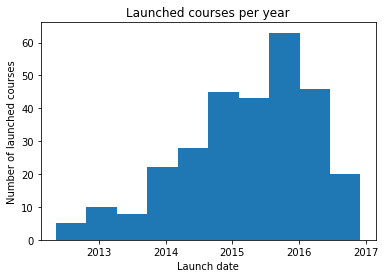

In [27]:
plt.hist(launched_courses_data, bins = 10)
plt.title("Launched courses per year")
plt.xlabel("Launch date")
plt.ylabel("Number of launched courses")
plt.show()

In [28]:
launched_courses_data.max()

Timestamp('2016-12-04 00:00:00')

We notice a tendency for the number of launched courses to rise with the years exponentially. The If we do the same histogram with more bins we notice another tendency - the number of lauches is at its peak in the beginning of the year. Let's check this.

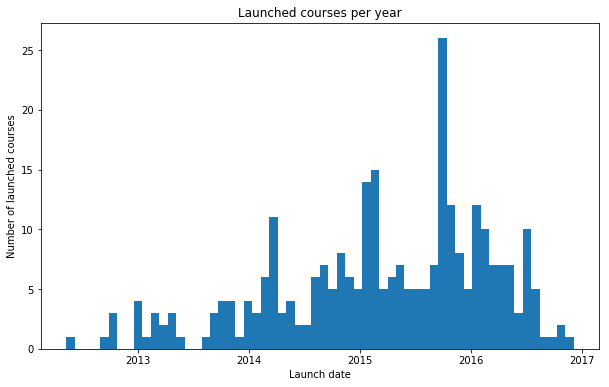

In [29]:
plt.figure(figsize = (10, 6))

plt.hist(launched_courses_data, bins = 60)

plt.title("Launched courses per year")
plt.xlabel("Launch date")
plt.ylabel("Number of launched courses")
plt.show()

In [30]:
launched_courses_by_month = course_data.groupby(course_data.launch_date.dt.month).size()
launched_courses_by_month

launch_date
1     41
2     30
3     31
4     22
5     23
6     12
7     14
8     18
9     38
10    37
11    14
12    10
dtype: int64

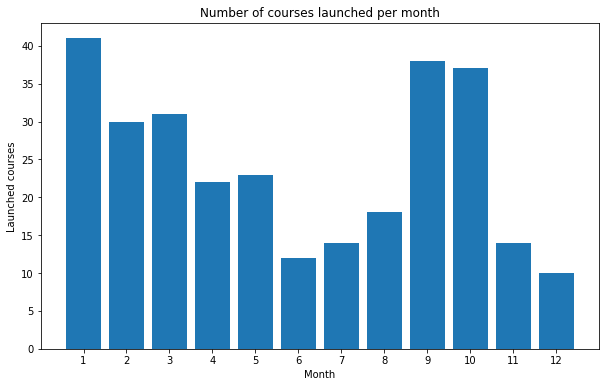

In [31]:
plt.figure(figsize = (10, 6))

plt.bar(launched_courses_by_month.index, launched_courses_by_month)

plt.title("Number of courses launched per month")
plt.xlabel("Month")
plt.ylabel("Launched courses")
plt.xticks(range(1, 12 + 1))
plt.show()

In [32]:
launched_courses_by_month.mean()

24.166666666666668

In [33]:
launched_courses_by_month.median()

22.5

The distribution seems to be bimodal. We notice a second peak at the beginning of the school/university year in September/October.

Let's explore the data further and see if the majority of people taking the courses could be students.

In [34]:
course_data.describe().T

,count,mean,std,min,25%,50%,75%,max
honor_code_certificates,290.0,0.813793,0.389946,0.00,1.0000,1.000,1.0000,1.00
participants_course_content_accessed,290.0,15344.334483,28207.578733,322.00,3815.0000,7901.500,18038.2500,301082.00
audited_>50%_course_content_accessed,290.0,2549.172414,3095.159969,187.00,755.2500,1517.000,3383.0000,25637.00
certified,290.0,843.810345,1105.594372,0.00,139.5000,395.500,1201.7500,5783.00
%_audited,290.0,24.916966,15.883538,2.63,14.2150,20.425,33.8375,83.96
%_certified,290.0,7.782586,6.972437,0.00,2.4075,5.950,10.6875,33.98
%_certified_of_>50%_course_content_accessed,290.0,31.445655,19.751102,0.00,13.4000,31.270,47.6225,77.09
%_posted_in_forum,290.0,9.347517,7.517141,0.00,3.9925,7.245,14.1075,35.28
%_grade_higher_than_zero,290.0,21.210379,13.411540,0.00,10.5900,19.605,30.9025,52.35
total_course_hours_thousands,290.0,94.981828,157.617610,0.11,12.9600,37.710,97.2250,895.01


In [35]:
course_data.corr()

,honor_code_certificates,participants_course_content_accessed,audited_>50%_course_content_accessed,certified,%_audited,%_certified,%_certified_of_>50%_course_content_accessed,%_posted_in_forum,%_grade_higher_than_zero,total_course_hours_thousands,median_hours_for_certification,median_age,%_male,%_female,%_bachelor's_degree_or_higher
honor_code_certificates,1.000000,0.134161,0.174369,0.291568,0.042920,0.389943,0.530508,0.042586,0.276590,0.109373,-0.027182,-0.010522,-0.010452,0.010452,-0.022623
participants_course_content_accessed,0.134161,1.000000,0.847322,0.393615,-0.285248,-0.178613,-0.030588,-0.082588,-0.064438,0.590511,-0.028065,-0.147049,0.160074,-0.160074,-0.267389
audited_>50%_course_content_accessed,0.174369,0.847322,1.000000,0.655384,-0.073175,-0.037472,0.034473,0.042764,0.109664,0.607135,-0.110162,-0.059283,0.101182,-0.101182,-0.111676
certified,0.291568,0.393615,0.655384,1.000000,-0.113874,0.271434,0.523452,0.293244,0.499465,0.650845,-0.012752,0.042400,0.033457,-0.033457,0.016376
%_audited,0.042920,-0.285248,-0.073175,-0.113874,1.000000,0.515623,-0.084667,0.103047,0.142404,-0.300210,-0.467050,0.340183,-0.267938,0.267938,0.439200
%_certified,0.389943,-0.178613,-0.037472,0.271434,0.515623,1.000000,0.672876,0.439747,0.621231,-0.076180,-0.352180,0.438928,-0.377929,0.377929,0.350974
%_certified_of_>50%_course_content_accessed,0.530508,-0.030588,0.034473,0.523452,-0.084667,0.672876,1.000000,0.390246,0.664573,0.230620,-0.005280,0.173132,-0.232383,0.232383,0.100555
%_posted_in_forum,0.042586,-0.082588,0.042764,0.293244,0.103047,0.439747,0.390246,1.000000,0.488611,0.046832,-0.179442,0.395985,-0.423630,0.423630,0.216679
%_grade_higher_than_zero,0.276590,-0.064438,0.109664,0.499465,0.142404,0.621231,0.664573,0.488611,1.000000,0.242803,-0.045449,0.185298,-0.185037,0.185037,0.209471
total_course_hours_thousands,0.109373,0.590511,0.607135,0.650845,-0.300210,-0.076180,0.230620,0.046832,0.242803,1.000000,0.356027,-0.175678,0.254005,-0.254005,-0.155914


In [36]:
age_distribution = course_data.median_age

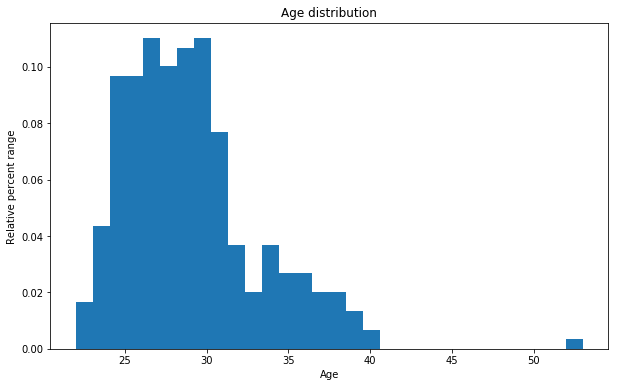

In [37]:
plt.figure(figsize = (10, 6))

plt.hist(age_distribution, bins=30, density=1)

plt.title("Age distribution")
plt.xlabel("Age")
plt.ylabel("Relative percent range")
plt.show()

In [38]:
age_distribution.mean()

29.3

In [39]:
age_distribution.median()

29.0

In [40]:
age_distribution.mode()

0    27.0
1    30.0
dtype: float64

In [41]:
age_distribution.skew()

1.2908979849009123

In [42]:
age_distribution.std()

4.047896630106513

The distribution of age shows us that the average person, taking a course on edX is indeed about 29.0 years old. Younger people participate in more online courses.

We can check what is the distribution of gender in the course participants.

In [43]:
course_data['%_male'].mean()

67.01068965517243

In [44]:
course_data['%_female'].mean()

32.98931034482757

More male participants are getting access to the courses.

Now let's look at the course subjects.

In [45]:
course_data.course_subject.unique()

array(['Science, Technology, Engineering, and Mathematics',
       'Computer Science', 'Government, Health, and Social Science',
       'Humanities, History, Design, Religion, and Education'],
      dtype=object)

In [46]:
course_data.course_subject.unique().size

4

In [47]:
top_course_subjects = course_data.groupby("course_subject").size().sort_values(ascending = False)
top_course_subjects

course_subject
Humanities, History, Design, Religion, and Education    94
Science, Technology, Engineering, and Mathematics       91
Government, Health, and Social Science                  75
Computer Science                                        30
dtype: int64

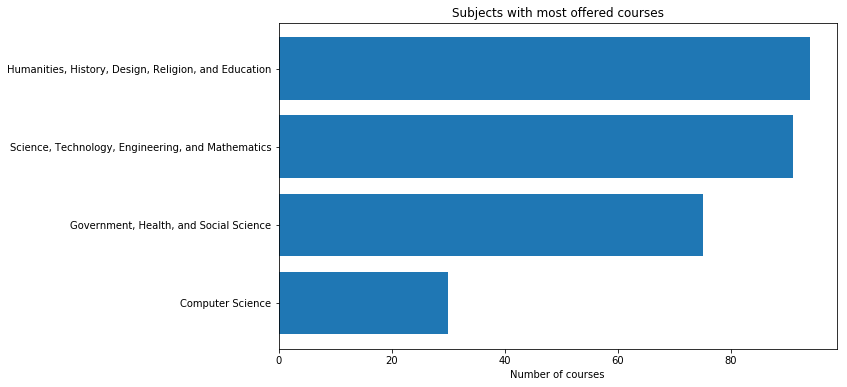

In [48]:
plt.figure(figsize = (10, 6))

plt.barh(range(len(top_course_subjects.index)), top_course_subjects)

plt.title("Subjects with most offered courses")
plt.xlabel("Number of courses")
plt.yticks(range(len(top_course_subjects)), top_course_subjects.index)
plt.gca().invert_yaxis()
plt.show()

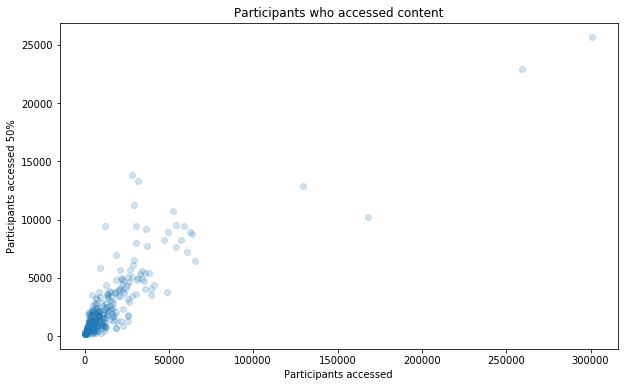

In [66]:
plt.figure(figsize = (10, 6))

plt.scatter(course_data.participants_course_content_accessed, course_data['audited_>50%_course_content_accessed'], alpha = 0.2)

plt.title("Participants who accessed content")
plt.xlabel("Participants accessed")
plt.ylabel("Participants accessed 50%")
plt.show()
plt.show()

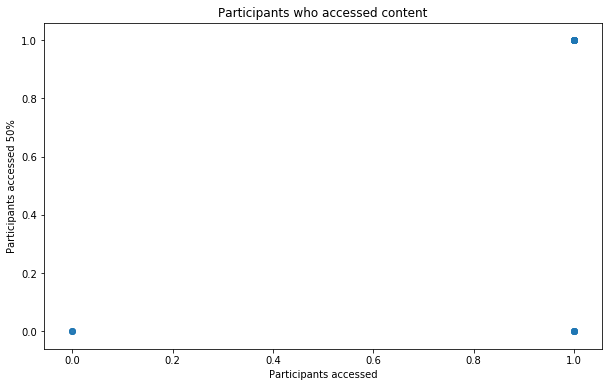

In [88]:
plt.figure(figsize = (10, 6))

plt.scatter(course_data['participants_course_content_accessed']<50000, course_data['audited_>50%_course_content_accessed']<5000, alpha = 0.2)

plt.title("Participants who accessed content")
plt.xlabel("Participants accessed")
plt.ylabel("Participants accessed 50%")
plt.show()
plt.show()

In [50]:
course_data[["participants_course_content_accessed", "audited_>50%_course_content_accessed"]].corr()

,participants_course_content_accessed,audited_>50%_course_content_accessed
participants_course_content_accessed,1.000000,0.847322
audited_>50%_course_content_accessed,0.847322,1.000000


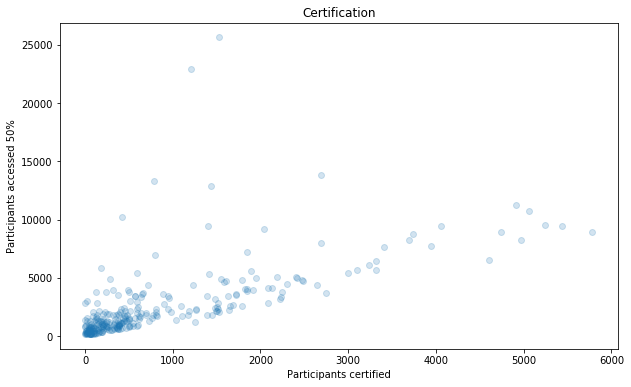

In [68]:
plt.figure(figsize = (10, 6))

plt.scatter(course_data.certified, course_data['audited_>50%_course_content_accessed'], alpha = 0.2)

plt.title("Certification")
plt.xlabel("Participants certified")
plt.ylabel("Participants accessed 50%")
plt.show()
plt.show()

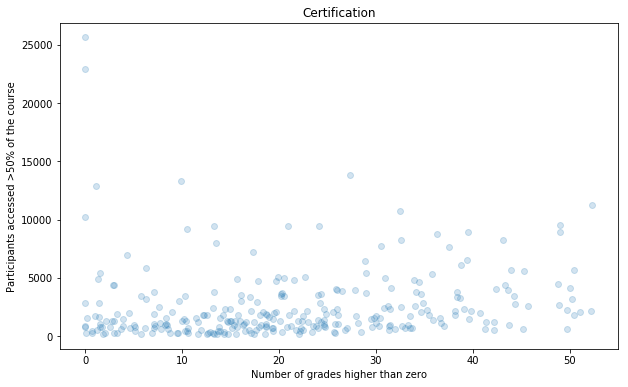

In [80]:
plt.figure(figsize = (10, 6))

plt.scatter(course_data['%_grade_higher_than_zero'], course_data['audited_>50%_course_content_accessed'], alpha = 0.2)

plt.title("Certification")
plt.xlabel("Number of grades higher than zero")
plt.ylabel("Participants accessed >50% of the course")
plt.show()
plt.show()

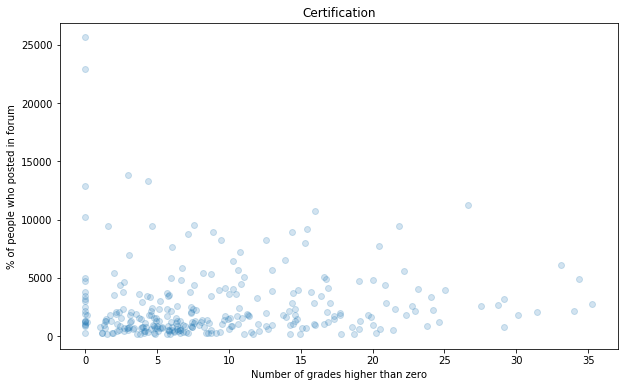

In [84]:
plt.figure(figsize = (10, 6))

plt.scatter(course_data['%_posted_in_forum'], course_data['audited_>50%_course_content_accessed'], alpha = 0.2)

plt.title("Certification")
plt.xlabel("Number of grades higher than zero")
plt.ylabel("% of people who posted in forum")
plt.show()
plt.show()

### Reading an additional dataset

We are reading a second dataset, which measures the global popularity of historical characters using two measures. The simpler of the two measures, which is denoted as L, is the number of different Wikipedia language editions that have an article about a historical character. The other one is the Historical Popularity Index (HPI), which corrects L by adding information on the age of the historical character, the concentration of page views among different languages, the coefficient of variation in page views, and the number of page views in languages other than English. It is going to help us determine which occupations or industries are the most popular.

In [51]:
pantheon_data = pd.read_csv("database.csv", index_col = "article_id")
pantheon_data.head()

,full_name,sex,birth_year,city,state,country,continent,latitude,longitude,occupation,industry,domain,article_languages,page_views,average_views,historical_popularity_index
article_id,,,,,,,,,,,,,,,,
308,Aristotle,Male,-384,Stageira,NaN,Greece,Europe,40.33333,23.50000,Philosopher,Philosophy,Humanities,152,56355172,370758,31.9938
22954,Plato,Male,-427,Athens,NaN,Greece,Europe,37.96667,23.71667,Philosopher,Philosophy,Humanities,142,46812003,329662,31.9888
1095706,Jesus Christ,Male,-4,Judea,NaN,Israel,Asia,32.50000,34.90000,Religious Figure,Religion,Institutions,214,60299092,281771,31.8981
25664190,Socrates,Male,-469,Athens,NaN,Greece,Europe,37.96667,23.71667,Philosopher,Philosophy,Humanities,137,40307143,294213,31.6521
783,Alexander the Great,Male,-356,Pella,NaN,Greece,Europe,40.80000,22.51667,Military Personnel,Military,Institutions,138,48358148,350421,31.5840


In [52]:
pantheon_data.shape

(11341, 16)

In [53]:
pantheon_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11341 entries, 308 to 26535791
Data columns (total 16 columns):
full_name                      11341 non-null object
sex                            11341 non-null object
birth_year                     11341 non-null object
city                           11341 non-null object
state                          2172 non-null object
country                        11308 non-null object
continent                      11311 non-null object
latitude                       10294 non-null float64
longitude                      10294 non-null float64
occupation                     11341 non-null object
industry                       11341 non-null object
domain                         11341 non-null object
article_languages              11341 non-null int64
page_views                     11341 non-null int64
average_views                  11341 non-null int64
historical_popularity_index    11341 non-null float64
dtypes: float64(3), int64(3), object(10

In [54]:
pantheon_data.isna().sum() / len(pantheon_data) * 100

full_name                       0.000000
sex                             0.000000
birth_year                      0.000000
city                            0.000000
state                          80.848250
country                         0.290980
continent                       0.264527
latitude                        9.231990
longitude                       9.231990
occupation                      0.000000
industry                        0.000000
domain                          0.000000
article_languages               0.000000
page_views                      0.000000
average_views                   0.000000
historical_popularity_index     0.000000
dtype: float64

We can see that there is a high percent of missing values in the feature "state".

In [55]:
pantheon_data.state.unique()

array([nan, 'Indre-et-Loire', 'GA', 'MS', 'CA', 'Segovia', 'Gilead', 'IL',
       'MA', 'VA', 'OH', 'KY', 'WA', 'PA', 'MN', 'Galilee', 'MO', 'NY',
       'NE', 'MI', 'Cáceres', 'AR', 'LA', 'ME', 'WI', 'NJ', 'Württemberg',
       'WV', 'FL', 'OK', 'CT', 'TX', 'IN', 'AL', 'TN', 'RI', 'MD', 'IA',
       'ND', 'VT', 'SC', 'Anhui', 'Shandong Province', 'Cantal', 'MT',
       'NC', 'Pyrénées-Atlantiques', 'KS', 'Kaluga Oblast', 'Oxfordshire',
       'OR', 'WY', 'Piedmont', 'Pernambuco', 'ID', 'NM', 'NH', 'CO', 'HI',
       'SD', 'Calabria', 'Yvelines', 'Ancona', 'Lazio', 'AZ', 'Ardennes',
       'La Rioja', 'UT', 'Loire', 'Eastern Cape', 'Buckinghamshire', 'DE',
       'Tamaulipas', 'Komi ASSR', 'County Mayo', 'NV', 'Sao Paulo',
       'Wales', 'Galicia', 'Victoria'], dtype=object)

Since we have information about the country and city, we don't need the missing information about state in this case. In fact we can drop this column.

In [56]:
pantheon_data.drop(["state"], axis = 1, inplace = True)

In [57]:
article_with_missing_country = pantheon_data[pantheon_data.country.isnull()]
article_with_missing_country.shape

(33, 15)

In [58]:
article_with_missing_continent = pantheon_data[pantheon_data.continent.isnull()]
article_with_missing_continent.shape

(30, 15)

The missing values for country and countinent are not so many, so we are going to drop them.

In [59]:
pantheon_data.dropna(axis = 0, inplace = True)
pantheon_data.head()

,full_name,sex,birth_year,city,country,continent,latitude,longitude,occupation,industry,domain,article_languages,page_views,average_views,historical_popularity_index
article_id,,,,,,,,,,,,,,,
308,Aristotle,Male,-384,Stageira,Greece,Europe,40.33333,23.50000,Philosopher,Philosophy,Humanities,152,56355172,370758,31.9938
22954,Plato,Male,-427,Athens,Greece,Europe,37.96667,23.71667,Philosopher,Philosophy,Humanities,142,46812003,329662,31.9888
1095706,Jesus Christ,Male,-4,Judea,Israel,Asia,32.50000,34.90000,Religious Figure,Religion,Institutions,214,60299092,281771,31.8981
25664190,Socrates,Male,-469,Athens,Greece,Europe,37.96667,23.71667,Philosopher,Philosophy,Humanities,137,40307143,294213,31.6521
783,Alexander the Great,Male,-356,Pella,Greece,Europe,40.80000,22.51667,Military Personnel,Military,Institutions,138,48358148,350421,31.5840


In [60]:
pantheon_data.shape

(10251, 15)

In [61]:
print(pantheon_data.industry.unique().size)
print(pantheon_data.industry.unique())

27
['Philosophy' 'Religion' 'Military' 'Invention' 'Government' 'Language'
 'Math' 'Music' 'Fine Arts' 'Natural Sciences' 'Explorers' 'History'
 'Social Sciences' 'Medicine' 'Companions' 'Activism' 'Design'
 'Film And Theatre' 'Business' 'Outlaws' 'Team Sports' 'Dance'
 'Engineering' 'Individual Sports' 'Media Personality' 'Law'
 'Computer Science']


In [62]:
print(pantheon_data.domain.unique().size)
print(pantheon_data.domain.unique())

8
['Humanities' 'Institutions' 'Science & Technology' 'Arts' 'Exploration'
 'Public Figure' 'Business & Law' 'Sports']


We will explore the domain feature to compare to the course subject feature from the first dataset.

In [63]:
top_searched_domains = pantheon_data.groupby("domain").size().sort_values(ascending = False)
top_searched_domains

domain
Arts                    2763
Institutions            2738
Sports                  1700
Science & Technology    1313
Humanities              1228
Public Figure            318
Business & Law           103
Exploration               88
dtype: int64

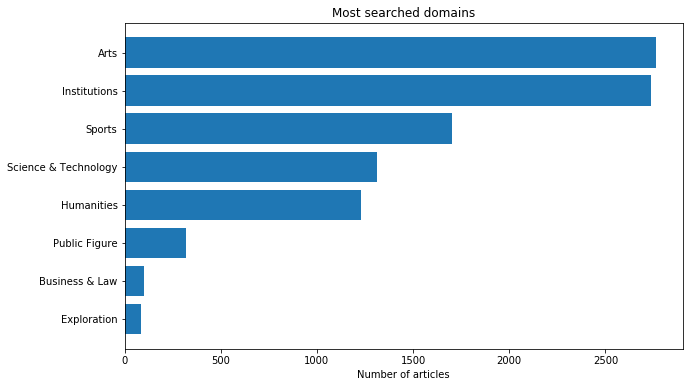

In [64]:
plt.figure(figsize = (10, 6))

plt.barh(range(len(top_searched_domains.index)), top_searched_domains)

plt.title("Most searched domains")
plt.xlabel("Number of articles")
plt.yticks(range(len(top_searched_domains)), top_searched_domains.index)
plt.gca().invert_yaxis()
plt.show()

### Conclusion

In the second dataset we see that more information is searched for on Arts and Humanities then on Science and Technology. In the first dataset we observe a similar tendency - more courses on Arts and Humanities are offered overall. Male learners are more present than female learners. Most of the participants are of younger age. The research can be further developed by looking at more recent data that inludes other universities offering MOOCs as well.

### References

1. Chuang I. & Ho, A. D. (2016). HarvardX and MITx: Four years of open online courses.
2. Suhang Jiang, Katerina Schenke, Jacquelynne Sue Eccles, Di Xu, Mark Warschauer.  University of California, Irvine. Females’ Enrollment and Completion in Science, Technology, Engineering, and Mathematics Massive Open Online Courses